## Load and setup simple test bench

In [11]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../evaluate/")
from aligners.smith_waterman import calculate_smith_waterman_distance
from aligners.bwamem2 import bwa_mem2_align
from aligners.minimap2 import minimap2_align
from aligners.bowtie2 import bowtie2_align

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
string2 = "ATGCTCGATCGATCGATCGAAATCGC"
string1 = "ATCGCCCTATGCTCGATCGATCGATCGAAATCGCAGCTCCTCTGACTCAAGAAGACTCGAATGCTCGATCGATCGATCGAAATCGCAGCCTCGAAGCCTCTTGAAA"
intervals = [1,10,50,100,500,1000,2000,5000,10000,100000]
reference_path = "/home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002.fasta"
with open(reference_path, "r") as f:
    control = f.read().replace("\n","")
sample_read = "AAATATAAGTCAGATATATCAAAATATAAGTCAGAATTTTACAAATATTGAAGTGTCATATCACATCAGAGTAACAACACCACCTAAGTACCAAATGATGATAATGAAACTTAGACCTACTGGAATTGAGTAGAGGTGAACATCATGTGA"

In [9]:
# from Bio.Blast import NCBIWWW
# from Bio.Blast import NCBIXML

# # Define your sequences as strings
# sequence1 = "AGTCGATCGATCGATCGATCG"
# sequence2 = "AGTCGATCGATCGATCG"

# # Perform BLAST alignment
# result_handle = NCBIWWW.qblast("blastn", "nt", sequence1)

# # Parse the BLAST result
# blast_records = NCBIXML.parse(result_handle)

# # Iterate through the BLAST records and print alignments
# for record in blast_records:
#     for alignment in record.alignments:
#         print(f"Alignment Title: {alignment.title}")
#         print(f"Alignment Length: {alignment.length}")
#         for hsp in alignment.hsps:
#             print(f"Score: {hsp.score}")
#             print(f"Query: {hsp.query}")
#             print(f"Match: {hsp.match}")
#             print(f"Subject: {hsp.sbjct}")

## Naive Smith-Waterman Distance

In [14]:
import time
start = time.time()
# EXPENSIVE!
print(calculate_smith_waterman_distance(string1, 
                                    string2, 
                                    match_score=2,
                                    mismatch_penalty=-1,
                                    open_gap_penalty=-0.5,
                                    continue_gap_penalty=-0.1,
                                    debug = True))
print(time.time() - start)

Best match:
target            8 ATGCTCGATCGATCGATCGAAATCGC 34
                  0 |||||||||||||||||||||||||| 26
query             0 ATGCTCGATCGATCGATCGAAATCGC 26

{'elapsed time': 0.0021452903747558594, 'distance': -52.0, 'begins': [8]}
0.002481698989868164


## BWA-Mem 2

Looking to launch executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2", simd = .avx2
Launching executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2"
-----------------------------
Executing in AVX2 mode!!
-----------------------------
* SA compression enabled with xfactor: 8
* Ref file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/
* Entering FMI_search
ERROR! Unable to open the file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/.bwt.2bit.64
Looking to launch executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2", simd = .avx2
Launching executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2"


Error during BWA-MEM2 alignment: Command '/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2 mem -t 1 /home/pholur/XXXX-2/evaluate/data/chromosome_2/ temp_reads.fastq > ./test.sam' returned non-zero exit status 1.


-----------------------------
Executing in AVX2 mode!!
-----------------------------
* SA compression enabled with xfactor: 8
* Ref file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/
* Entering FMI_search
ERROR! Unable to open the file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/.bwt.2bit.64
Looking to launch executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2", simd = .avx2
Launching executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2"


Error during BWA-MEM2 alignment: Command '/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2 mem -t 1 /home/pholur/XXXX-2/evaluate/data/chromosome_2/ temp_reads.fastq > ./test.sam' returned non-zero exit status 1.


-----------------------------
Executing in AVX2 mode!!
-----------------------------
* SA compression enabled with xfactor: 8
* Ref file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/
* Entering FMI_search
ERROR! Unable to open the file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/.bwt.2bit.64
Looking to launch executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2", simd = .avx2
Launching executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2"


Error during BWA-MEM2 alignment: Command '/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2 mem -t 1 /home/pholur/XXXX-2/evaluate/data/chromosome_2/ temp_reads.fastq > ./test.sam' returned non-zero exit status 1.


-----------------------------
Executing in AVX2 mode!!
-----------------------------
* SA compression enabled with xfactor: 8
* Ref file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/
* Entering FMI_search
ERROR! Unable to open the file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/.bwt.2bit.64
Looking to launch executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2", simd = .avx2
Launching executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2"


Error during BWA-MEM2 alignment: Command '/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2 mem -t 1 /home/pholur/XXXX-2/evaluate/data/chromosome_2/ temp_reads.fastq > ./test.sam' returned non-zero exit status 1.


-----------------------------
Executing in AVX2 mode!!
-----------------------------
* SA compression enabled with xfactor: 8
* Ref file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/
* Entering FMI_search
ERROR! Unable to open the file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/.bwt.2bit.64
Looking to launch executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2", simd = .avx2
Launching executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2"


Error during BWA-MEM2 alignment: Command '/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2 mem -t 1 /home/pholur/XXXX-2/evaluate/data/chromosome_2/ temp_reads.fastq > ./test.sam' returned non-zero exit status 1.


-----------------------------
Executing in AVX2 mode!!
-----------------------------
* SA compression enabled with xfactor: 8
* Ref file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/
* Entering FMI_search
ERROR! Unable to open the file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/.bwt.2bit.64
Looking to launch executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2", simd = .avx2
Launching executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2"


Error during BWA-MEM2 alignment: Command '/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2 mem -t 1 /home/pholur/XXXX-2/evaluate/data/chromosome_2/ temp_reads.fastq > ./test.sam' returned non-zero exit status 1.


-----------------------------
Executing in AVX2 mode!!
-----------------------------
* SA compression enabled with xfactor: 8
* Ref file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/
* Entering FMI_search
ERROR! Unable to open the file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/.bwt.2bit.64
Looking to launch executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2", simd = .avx2
Launching executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2"


Error during BWA-MEM2 alignment: Command '/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2 mem -t 1 /home/pholur/XXXX-2/evaluate/data/chromosome_2/ temp_reads.fastq > ./test.sam' returned non-zero exit status 1.


-----------------------------
Executing in AVX2 mode!!
-----------------------------
* SA compression enabled with xfactor: 8
* Ref file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/
* Entering FMI_search
ERROR! Unable to open the file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/.bwt.2bit.64
Looking to launch executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2", simd = .avx2
Launching executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2"


Error during BWA-MEM2 alignment: Command '/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2 mem -t 1 /home/pholur/XXXX-2/evaluate/data/chromosome_2/ temp_reads.fastq > ./test.sam' returned non-zero exit status 1.


-----------------------------
Executing in AVX2 mode!!
-----------------------------
* SA compression enabled with xfactor: 8
* Ref file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/
* Entering FMI_search
ERROR! Unable to open the file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/.bwt.2bit.64
Looking to launch executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2", simd = .avx2
Launching executable "/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2.avx2"


Error during BWA-MEM2 alignment: Command '/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2 mem -t 1 /home/pholur/XXXX-2/evaluate/data/chromosome_2/ temp_reads.fastq > ./test.sam' returned non-zero exit status 1.


-----------------------------
Executing in AVX2 mode!!
-----------------------------
* SA compression enabled with xfactor: 8
* Ref file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/
* Entering FMI_search
ERROR! Unable to open the file: /home/pholur/XXXX-2/evaluate/data/chromosome_2/.bwt.2bit.64


Error during BWA-MEM2 alignment: Command '/home/pholur/XXXX-2/evaluate/aligners/bwa-mem2-2.2.1_x64-linux/bwa-mem2 mem -t 1 /home/pholur/XXXX-2/evaluate/data/chromosome_2/ temp_reads.fastq > ./test.sam' returned non-zero exit status 1.


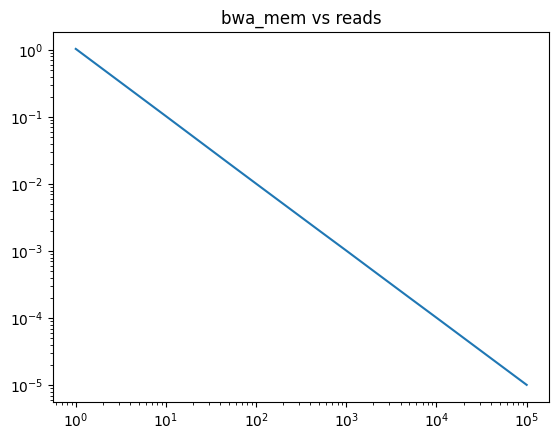

In [36]:
time_per_read_bwa = []
for i in intervals:
    start = time.time()
    indices = bwa_mem2_align(reference_path, [sample_read]*1, "/home/pholur/XXXX-2/evaluate/aligners", "./test.sam");
    time_per_read_bwa.append((time.time() - start)/i)
plt.plot(intervals, time_per_read_bwa)
plt.xscale("log")
plt.yscale("log")
plt.title("bwa_mem vs reads")
plt.show()

## Minimap2

[M::mm_idx_gen::10.586*1.00] collected minimizers
[M::mm_idx_gen::12.126*1.21] sorted minimizers
[M::main::12.126*1.21] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::12.126*1.21] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; is_hpc: 0; #seq: 1
[M::mm_idx_stat::12.708*1.20] distinct minimizers: 34570761 (96.85% are singletons); average occurrences: 1.163; average spacing: 6.024; total length: 242193529
[M::worker_pipeline::12.709*1.20] mapped 1 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: /home/pholur/XXXX-2/evaluate/aligners/minimap2/minimap2 -ax sr /home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002.fasta temp_reads.fastq
[M::main] Real time: 12.783 sec; CPU: 15.323 sec; Peak RSS: 1.933 GB


minimap2 alignment completed successfully.


[M::mm_idx_gen::10.450*1.00] collected minimizers
[M::mm_idx_gen::11.897*1.22] sorted minimizers
[M::main::11.897*1.22] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::11.897*1.22] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; is_hpc: 0; #seq: 1
[M::mm_idx_stat::12.578*1.20] distinct minimizers: 34570761 (96.85% are singletons); average occurrences: 1.163; average spacing: 6.024; total length: 242193529
[M::worker_pipeline::12.580*1.20] mapped 10 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: /home/pholur/XXXX-2/evaluate/aligners/minimap2/minimap2 -ax sr /home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002.fasta temp_reads.fastq
[M::main] Real time: 12.680 sec; CPU: 15.244 sec; Peak RSS: 1.947 GB


minimap2 alignment completed successfully.


[M::mm_idx_gen::10.482*1.00] collected minimizers
[M::mm_idx_gen::11.807*1.22] sorted minimizers
[M::main::11.807*1.22] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::11.807*1.22] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; is_hpc: 0; #seq: 1
[M::mm_idx_stat::12.549*1.20] distinct minimizers: 34570761 (96.85% are singletons); average occurrences: 1.163; average spacing: 6.024; total length: 242193529
[M::worker_pipeline::12.551*1.20] mapped 50 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: /home/pholur/XXXX-2/evaluate/aligners/minimap2/minimap2 -ax sr /home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002.fasta temp_reads.fastq
[M::main] Real time: 12.633 sec; CPU: 15.191 sec; Peak RSS: 1.968 GB


minimap2 alignment completed successfully.


[M::mm_idx_gen::10.241*1.00] collected minimizers
[M::mm_idx_gen::11.753*1.22] sorted minimizers
[M::main::11.753*1.22] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::11.753*1.22] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; is_hpc: 0; #seq: 1
[M::mm_idx_stat::12.637*1.20] distinct minimizers: 34570761 (96.85% are singletons); average occurrences: 1.163; average spacing: 6.024; total length: 242193529
[M::worker_pipeline::12.641*1.20] mapped 100 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: /home/pholur/XXXX-2/evaluate/aligners/minimap2/minimap2 -ax sr /home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002.fasta temp_reads.fastq
[M::main] Real time: 12.753 sec; CPU: 15.332 sec; Peak RSS: 1.955 GB


minimap2 alignment completed successfully.


[M::mm_idx_gen::10.166*0.99] collected minimizers
[M::mm_idx_gen::11.662*1.21] sorted minimizers
[M::main::11.663*1.21] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::11.663*1.21] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; is_hpc: 0; #seq: 1
[M::mm_idx_stat::12.326*1.20] distinct minimizers: 34570761 (96.85% are singletons); average occurrences: 1.163; average spacing: 6.024; total length: 242193529
[M::worker_pipeline::12.334*1.20] mapped 500 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: /home/pholur/XXXX-2/evaluate/aligners/minimap2/minimap2 -ax sr /home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002.fasta temp_reads.fastq
[M::main] Real time: 12.393 sec; CPU: 14.835 sec; Peak RSS: 1.948 GB


minimap2 alignment completed successfully.


[M::mm_idx_gen::10.068*1.00] collected minimizers
[M::mm_idx_gen::11.563*1.23] sorted minimizers
[M::main::11.563*1.23] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::11.563*1.23] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; is_hpc: 0; #seq: 1
[M::mm_idx_stat::12.295*1.22] distinct minimizers: 34570761 (96.85% are singletons); average occurrences: 1.163; average spacing: 6.024; total length: 242193529
[M::worker_pipeline::12.316*1.22] mapped 1000 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: /home/pholur/XXXX-2/evaluate/aligners/minimap2/minimap2 -ax sr /home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002.fasta temp_reads.fastq
[M::main] Real time: 12.386 sec; CPU: 15.038 sec; Peak RSS: 1.949 GB


minimap2 alignment completed successfully.


[M::mm_idx_gen::10.303*1.00] collected minimizers
[M::mm_idx_gen::11.694*1.22] sorted minimizers
[M::main::11.694*1.22] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::11.694*1.22] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; is_hpc: 0; #seq: 1
[M::mm_idx_stat::12.385*1.21] distinct minimizers: 34570761 (96.85% are singletons); average occurrences: 1.163; average spacing: 6.024; total length: 242193529
[M::worker_pipeline::12.407*1.21] mapped 2000 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: /home/pholur/XXXX-2/evaluate/aligners/minimap2/minimap2 -ax sr /home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002.fasta temp_reads.fastq
[M::main] Real time: 12.479 sec; CPU: 15.074 sec; Peak RSS: 1.969 GB


minimap2 alignment completed successfully.


[M::mm_idx_gen::10.506*1.00] collected minimizers
[M::mm_idx_gen::11.956*1.22] sorted minimizers
[M::main::11.956*1.22] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::11.956*1.22] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; is_hpc: 0; #seq: 1
[M::mm_idx_stat::13.149*1.20] distinct minimizers: 34570761 (96.85% are singletons); average occurrences: 1.163; average spacing: 6.024; total length: 242193529
[M::worker_pipeline::13.195*1.20] mapped 5000 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: /home/pholur/XXXX-2/evaluate/aligners/minimap2/minimap2 -ax sr /home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002.fasta temp_reads.fastq
[M::main] Real time: 13.287 sec; CPU: 15.984 sec; Peak RSS: 1.956 GB


minimap2 alignment completed successfully.


[M::mm_idx_gen::10.661*0.99] collected minimizers
[M::mm_idx_gen::12.026*1.22] sorted minimizers
[M::main::12.026*1.22] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::12.026*1.22] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; is_hpc: 0; #seq: 1
[M::mm_idx_stat::12.666*1.21] distinct minimizers: 34570761 (96.85% are singletons); average occurrences: 1.163; average spacing: 6.024; total length: 242193529
[M::worker_pipeline::12.757*1.21] mapped 10000 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: /home/pholur/XXXX-2/evaluate/aligners/minimap2/minimap2 -ax sr /home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002.fasta temp_reads.fastq
[M::main] Real time: 12.863 sec; CPU: 15.576 sec; Peak RSS: 1.958 GB


minimap2 alignment completed successfully.


[M::mm_idx_gen::10.695*1.00] collected minimizers
[M::mm_idx_gen::12.214*1.21] sorted minimizers
[M::main::12.214*1.21] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::12.214*1.21] mid_occ = 1000
[M::mm_idx_stat] kmer size: 21; skip: 11; is_hpc: 0; #seq: 1
[M::mm_idx_stat::12.986*1.20] distinct minimizers: 34570761 (96.85% are singletons); average occurrences: 1.163; average spacing: 6.024; total length: 242193529
[M::worker_pipeline::13.844*1.26] mapped 100000 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: /home/pholur/XXXX-2/evaluate/aligners/minimap2/minimap2 -ax sr /home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002.fasta temp_reads.fastq
[M::main] Real time: 13.973 sec; CPU: 17.598 sec; Peak RSS: 1.999 GB


minimap2 alignment completed successfully.


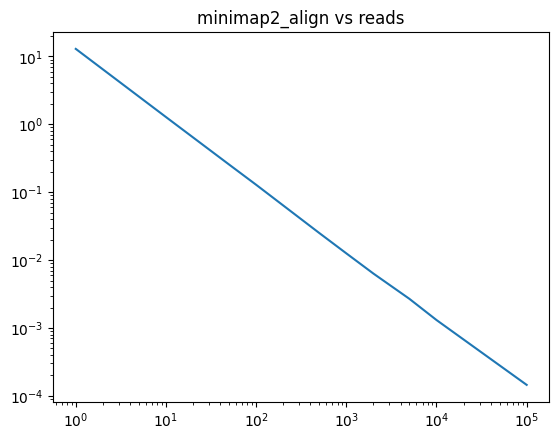

In [25]:
time_per_read_minimap = []
for i in intervals:
    start = time.time()
    indices = minimap2_align("/home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002.fasta", [sample_read]*i, 
                "/home/pholur/XXXX-2/evaluate/aligners", "./test.sam");
    time_per_read_minimap.append((time.time() - start)/i)
plt.plot(intervals, time_per_read_minimap)
plt.xscale("log")
plt.yscale("log")
plt.title("minimap2_align vs reads")
plt.show()

## Bowtie2

1 reads; of these:
  1 (100.00%) were unpaired; of these:
    0 (0.00%) aligned 0 times
    1 (100.00%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
100.00% overall alignment rate


Bowtie2 alignment completed successfully.
Bowtie2 alignment completed successfully.


10 reads; of these:
  10 (100.00%) were unpaired; of these:
    0 (0.00%) aligned 0 times
    10 (100.00%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
100.00% overall alignment rate


Bowtie2 alignment completed successfully.
Bowtie2 alignment completed successfully.


50 reads; of these:
  50 (100.00%) were unpaired; of these:
    0 (0.00%) aligned 0 times
    50 (100.00%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
100.00% overall alignment rate


Bowtie2 alignment completed successfully.
Bowtie2 alignment completed successfully.


100 reads; of these:
  100 (100.00%) were unpaired; of these:
    0 (0.00%) aligned 0 times
    100 (100.00%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
100.00% overall alignment rate


Bowtie2 alignment completed successfully.
Bowtie2 alignment completed successfully.


500 reads; of these:
  500 (100.00%) were unpaired; of these:
    0 (0.00%) aligned 0 times
    500 (100.00%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
100.00% overall alignment rate


Bowtie2 alignment completed successfully.
Bowtie2 alignment completed successfully.


1000 reads; of these:
  1000 (100.00%) were unpaired; of these:
    0 (0.00%) aligned 0 times
    1000 (100.00%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
100.00% overall alignment rate


Bowtie2 alignment completed successfully.
Bowtie2 alignment completed successfully.


2000 reads; of these:
  2000 (100.00%) were unpaired; of these:
    0 (0.00%) aligned 0 times
    2000 (100.00%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
100.00% overall alignment rate


Bowtie2 alignment completed successfully.
Bowtie2 alignment completed successfully.


5000 reads; of these:
  5000 (100.00%) were unpaired; of these:
    0 (0.00%) aligned 0 times
    5000 (100.00%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
100.00% overall alignment rate


Bowtie2 alignment completed successfully.
Bowtie2 alignment completed successfully.


10000 reads; of these:
  10000 (100.00%) were unpaired; of these:
    0 (0.00%) aligned 0 times
    10000 (100.00%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
100.00% overall alignment rate


Bowtie2 alignment completed successfully.
Bowtie2 alignment completed successfully.


100000 reads; of these:
  100000 (100.00%) were unpaired; of these:
    0 (0.00%) aligned 0 times
    100000 (100.00%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
100.00% overall alignment rate


Bowtie2 alignment completed successfully.
Bowtie2 alignment completed successfully.


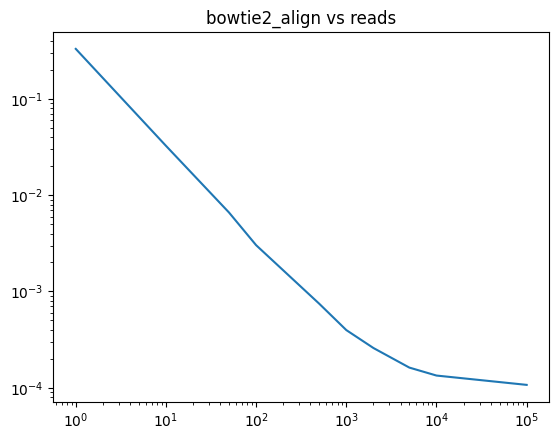

In [33]:
time_per_read_bowtie = []
for i in intervals:
    start = time.time()
    indices = bowtie2_align("/home/pholur/XXXX-2/evaluate/data/chromosome_2/NC_000002", [sample_read]*i, "/home/pholur/XXXX-2/evaluate/aligners/bowtie2-2.5.1-linux-x86_64", "./test.sam");
    time_per_read_bowtie.append((time.time() - start)/i)
plt.plot(intervals, time_per_read_bowtie)
plt.xscale("log")
plt.yscale("log")
plt.title("bowtie2_align vs reads")
plt.show()

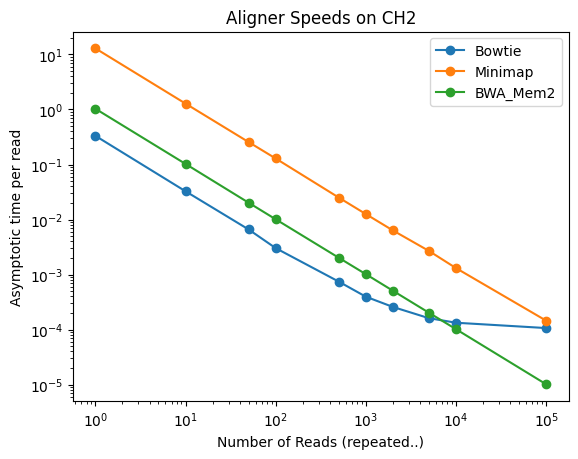

In [43]:
plt.plot(intervals, time_per_read_bowtie, label="Bowtie", marker="o")
plt.plot(intervals, time_per_read_minimap, label="Minimap", marker="o")
plt.plot(intervals, time_per_read_bwa , label="BWA_Mem2", marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Reads (repeated..)")
plt.ylabel("Asymptotic time per read")
plt.legend()
plt.title("Aligner Speeds on CH2")
plt.show()

In [60]:
test_read = "GCCACTGCACTCTAGCCTGGCAACAAAGCGAGACTCCATCTGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGATATTTTCAGAGATGATAGCCGGGCGTAGTGGCTCATGCTTGTAATCCCAGCATTTTGGGAGGCTGAGGAGGTGGGATCACTTGAGGTCAGAAGTTTGAGACCAGCCTGGCCAACATGGCAAAACCCCATCTTTACTAATAATACCAAAAAAATTAGCTGGGCGCCGTGG"
store.index.query(store.model.encode([test_read]), top_k=10, include_metadata=True,
                                      namespace = ">chr1 CP068277.2 Homo sapiens isolate CHM13 chromosome 1")

{'matches': [{'id': 'patgdhguhucbgvvwowys',
              'metadata': {'local_position': '94906000',
                           'metadata': '>chr1 CP068277.2 Homo sapiens isolate '
                                       'CHM13 chromosome 1',
                           'position': '94906000',
                           'text': 'ATGGTCATTTCTCCTTAGATGACCATCTGTGTGTGTGTGTGTGTGTGTGTGTGTGTATGTAGATATATACATATGACCTATATATAATATGAAAAAGGATTAGTTTACAGAATAGACAAGTAGAAAAAAGAGAAGAAAATGGTCCTAAATTGAAGAAAGATCGTAAGAGTCCACTGAATTCAAGAAAGAATTAATAAGAAAACAGACATGTAGACATGGACTGATTAAATTTCAGAATTCTAAGGAAAGAGAATCAAACTAGGATCAAACATCTTTTCTGGAACTCTGACTGCTGGAAGAGAATGGAATAGTATTTACACACTCTGAGAGGAAAAAATTATGGCATTACAATTAGTATTGTACATCAAGCCAAACAACTGTAGGGATATTATGTCACAACAAAGGTATCTTCAGGCCGGGCATGGTGGGATCACCCCTGTAATCCCAGCACTTTGGGAGGCTGAGGTGGGCGGATCATGAGGTCAGGAGATCGAGACCATCCTGGCCAACATGGTGAAAACCCGCCTCTACTAAAAATACAAAAATTAGCTGGGCATGGTGGCACATGCCTGTAATCCCAGCTACTTGGGAGGCTGAGGCAGGAGAATTGCTTGAACCAGGGAATCGGAAGTTGCCATGAGCCAAGATCACGCCACTGCACTCTAGCCTGG

In [4]:
from pinecone_store import PineconeStore
from helpers import initialize_pinecone
from aligners.smith_waterman import calculate_smith_waterman_distance
test_read = "CCCCACCTTCCCCGCCCGGGAGAGCCAGGCCGGACAGCGGCCTCCCTCAGACCCGTCCCCAAGGCCGAGCCTCGCCCTGGGCCGTGCTGGTGCCCCATTCGGGACGGAGCGGTGGCCCGTCAGCACTTCCACGGCCTCCTCAGCAGGCCAGATGGGCAGGGCCGGCCTGGTGTCTCCCCGCCTGGCCGCGCGCTCGCGGGCAGCGATGACCCCAGGCAGCGGGCGACCCCAGGCGGACGGCAG"
print(len(test_read))

# 1420824468
for (store, _, _) in initialize_pinecone(["trained-all-longer"], ["all"], device="cuda:3"):
    queries = [test_read]*10
    starts = [0]*10
    returned_ = store.query_batch(queries, starts, 50, prioritize=True, hotstart_list=[">chr1 CP068277.2 Homo sapiens isolate CHM13 chromosome 1"]*10)
    print(returned_);
    for returned in returned_:
        for match_ in returned["matches"]:
            distance = calculate_smith_waterman_distance(test_read, match_["metadata"]["text"])["distance"]
            match_["metadata"]["SW_distance"] = distance
            print(match_)
            break

        break
    break
# break


243
[{'index': 0,
 'matches': [{'id': 'cgxrzlrmplvbqobbyqlm',
              'metadata': {'local_position': '1212000',
                           'metadata': '>chr1 CP068277.2 Homo sapiens isolate '
                                       'CHM13 chromosome 1',
                           'position': '1212000',
                           'text': 'GGGTGGGGGTGGTCCTTGGCCTGGGAAGGAAAACTCCACCAGGCCTTCGGAGCTGGGCACGCCCTGTTCCCACAATTAAGAAAAAAAACGACGACCTAGAGCTCAAGGCCGGTGCTGACATCTGACCTACTGGATGGCAGCCGCCTGTAGGAACATCACCATAGACTATTGGAATTTTCTGGCAAGTACTGGGCACTAAATCAGAGATGTGTTTTTAGAGAATTCCATGCCAATACTGCTGTATAGAATCTTTTATTCATACTTTCCCACTAGGTTTGGGCCCCTCTAAGCTTTCACGAGTCAAAGACCCCTCCTGCTTGCTGAAACCACCCACGGAAGGCCGGACACCGAGGACCTGGCCGCCCAAGCAGAGGCGACTGACAAGCGCGGTCCGGGCTGGACGGCCCCACCTTCCCCGCCCGGGAGAGCCAGGCCGGACAGCGGCCTCCCTCAGACCCGTCCCCAAGGCCGAGCCTCGCCCTGGGCCGTGCTGGTGCCCCATTCGGGACGGAGCGGTGGCCCGTCAGCACTTCCACGGCCTCCTCAGCAGGCCAGATGGGCAGGGCCGGCCTGGTGTCTCCCCGCCTGGCCGCGCGCTCGCGGGCAGCGATGACCCCAGGCAGCGGGCGACCCCAGGCGGACGGCAGGCCGGGTC

In [3]:
returned_

[{'index': 0,
  'matches': [{'id': 'vtxhinmdweyfpjxlvwxu',
               'metadata': {'local_position': '57572000',
                            'metadata': 'chrX',
                            'position': '2958127906',
                            'text': 'GGAGAGACACGCACACCGGGTGGTAGCCAGAGTTTCCACAACCCCCCCCCCCCCCGGGTCAGGCGCAGGGGCTTTCGGGAAGTCCCTGACCTCTGGCAGAACACCCTGGCTTCTTCAACCTCCCCCTGAAAGCCTGGCCACCTGAATCCGTCCTCCGCAGGACTTCTTGCTGCTTTGGGGTGCCTTTGGTGGGAGAGACATGCACACCGGGTGGGAGCCAGGGACTCCATGACCCCCCGCCAGGTGGGGCACGAGGCTGCTGGGAAAACCCTGACTTCTGGCAGGGCACCCCGGGTTTTCAACATCTCCATGAAACCCTGGCCACCTGTCTTTGTCCCTGGGAAACTTCTAGCCTATTTGGGTTGCCTTGGATAAGACAGAGATGCCCCCCAGGTGGTAGCCAGTGACTACATGACCTCCCTGGGTTGGGTGCAGTATCTGCCAGGAAGGTCCTGACTTCCAGTGGGGCACACTGGCCTCGTCTTTGCCATTAAGGCTTTTGTCCTAGGCCTGCCTCAACCTCCCCGTGAAAGCCTGGCCGCCTGTATCCATCCCCCGGGGGGCATCTGGCCACTTTTGGGTGCCTTTGGTGGGAGAGACAGGCACCCCAGGTCAAGTGCAAGAGCCACCGAGAAGGCCCTTACCTCTGGTGGGGCACTCAGCCTCCTCAACCTCCCCCTGAAAGCCTGGCCGCCTGTGTCCATCCACTGGGGGACTTCTGGCCACTTTGGGGTGCCTTCAGTG